In [8]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
import h5py
from load_data import voxelize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from io import BytesIO
from PIL import Image

def visualize_voxel(voxel_grid):
    """
    Visualizes a 3D binary voxel grid using matplotlib.

    Parameters:
    voxel_grid (numpy.ndarray): A 3D binary voxel grid where 1 indicates occupancy and 0 indicates empty.
    """

    # Get the coordinates of occupied voxels
    occupied_voxels = np.argwhere(voxel_grid == 1)

    # Create a 3D plot
    fig = plt.figure()
    plt.tight_layout()

    ax = fig.add_subplot(111, projection='3d')

    # Plot occupied voxels as scatter points
    ax.scatter(occupied_voxels[:, 0], occupied_voxels[:, 2], occupied_voxels[:, 1])

    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Set the aspect ratio to be equal
    ax.set_box_aspect([1, 1, 1])

    # Set the limits for the axes
    ax.set_xlim([0, voxel_grid.shape[0]])
    ax.set_ylim([0, voxel_grid.shape[1]])
    ax.set_zlim([0, voxel_grid.shape[2]])
    
    ax.axis("off")
    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)  # Move the buffer cursor to the beginning
    plt.close()
    # Convert the buffer into a Pillow Image
    img = Image.open(buf)
    return img

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
# load the preprocessed original voxel data. (batch_size, 128, 128, 128)

# chair
voxels_chair_128 = np.load("./data/hdf5_data/chair_voxels_train.npy")
print(voxels_chair_128.shape)

# airplane
voxels_airplane_128 = np.load("./data/hdf5_data/airplane_voxels_train.npy")
print(voxels_airplane_128.shape)

# table
voxels_table_128 = np.load("./data/hdf5_data/table_voxels_train.npy")
print(voxels_table_128.shape)

(2658, 128, 128, 128)
(1958, 128, 128, 128)
(3835, 128, 128, 128)


In [44]:
print(voxels_chair_128.min(), voxels_chair_128.max(), voxels_chair_128.mean())
print(voxels_airplane_128.min(), voxels_airplane_128.max(), voxels_airplane_128.mean())
print(voxels_table_128.min(), voxels_table_128.max(), voxels_table_128.mean())


0.0 1.0 0.00097534136
0.0 1.0 0.00096314726
0.0 1.0 0.0009747045


In [45]:
# load the downsampled voxel data. (batch_size, 32, 32, 32)

voxels_chair_32 = np.load("./data/sampled_voxel/chair_voxels_train32.npy")
print(voxels_chair_32.shape)

voxels_airplane_32 = np.load("./data/sampled_voxel/airplane_voxels_train32.npy")
print(voxels_airplane_32.shape)

voxels_table_32 = np.load("./data/sampled_voxel/table_voxels_train32.npy")
print(voxels_table_32.shape)

(2658, 32, 32, 32)
(1958, 32, 32, 32)
(3835, 32, 32, 32)


In [46]:
print(voxels_chair_32.min(), voxels_chair_32.max(), voxels_chair_32.mean())
print(voxels_airplane_32.min(), voxels_airplane_32.max(), voxels_airplane_32.mean())
print(voxels_table_32.min(), voxels_table_32.max(), voxels_table_32.mean())

0.0 1.0 0.011863232
0.0 1.0 0.011415335
0.0 1.0 0.01588461


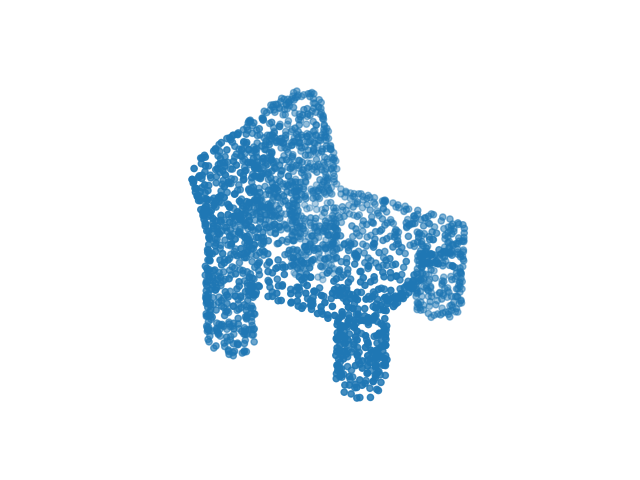

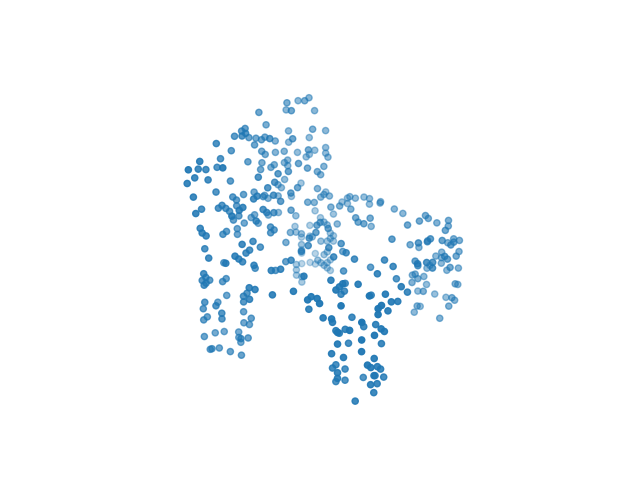

In [47]:
# Visualization : Chair
img_chair_128 = visualize_voxel(voxels_chair_128[14])
display(img_chair_128)
img_chair_32 = visualize_voxel(voxels_chair_32[14])
display(img_chair_32)

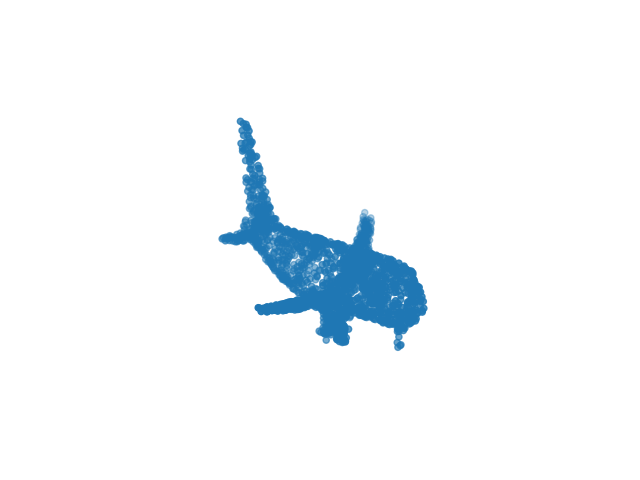

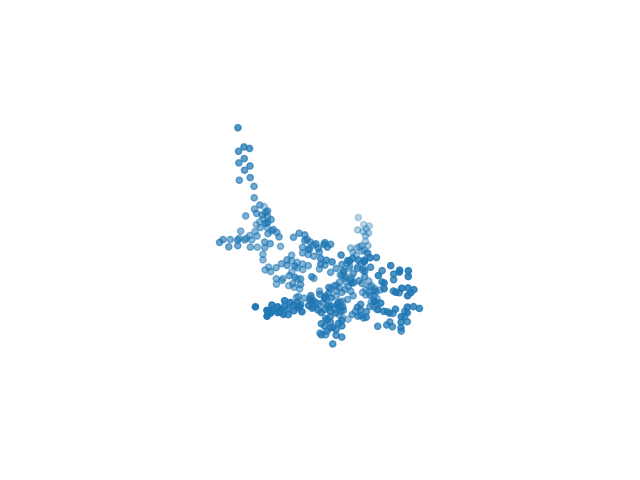

In [52]:
# Visualization : Airplane
img_airplane_128 = visualize_voxel(voxels_airplane_128[14])
display(img_airplane_128)
img_airplane_32 = visualize_voxel(voxels_airplane_32[14])
display(img_airplane_32)

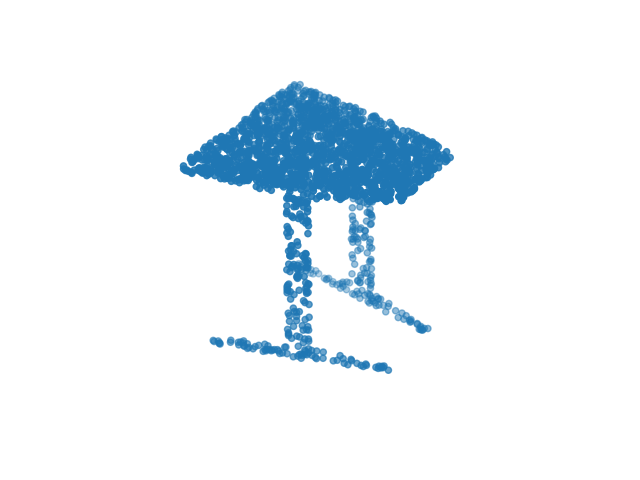

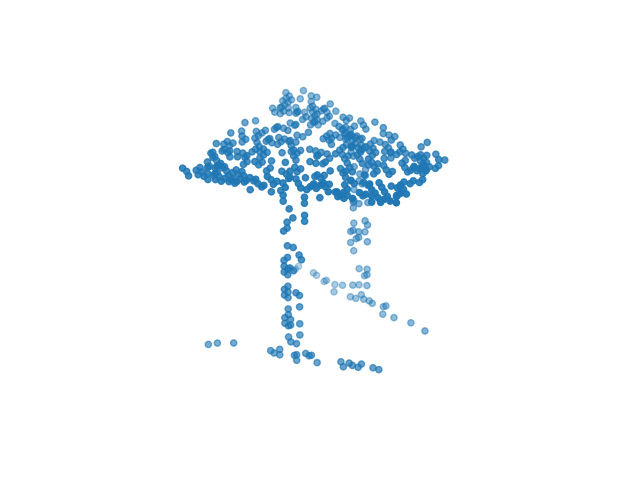

In [57]:
# Visualization : Table
img_table_128 = visualize_voxel(voxels_table_128[14])
display(img_table_128)
img_table_32 = visualize_voxel(voxels_table_32[14])
display(img_table_32)